In the last file we learned how to fit a bivariate linear model in R. We explored only some of the model estimates and outputs available including slope, intercept, predictions, residuals, and the sum of the squared residuals, known as the residual sum of squares (RSS).

We explored how fitting a linear model fits the line in such a way that the sum of the squared difference between the points and the line (the RSS) is minimized. We deepened our knowledge of slope and intercept by building functions in R to estimate these parameters "manually". We also learned how to directly access these coefficient estimates in our linear model object. And we used the estimates of slope and intercept to manually add a fit line to our scatterplot that matched the `lm` method in `ggplot`.

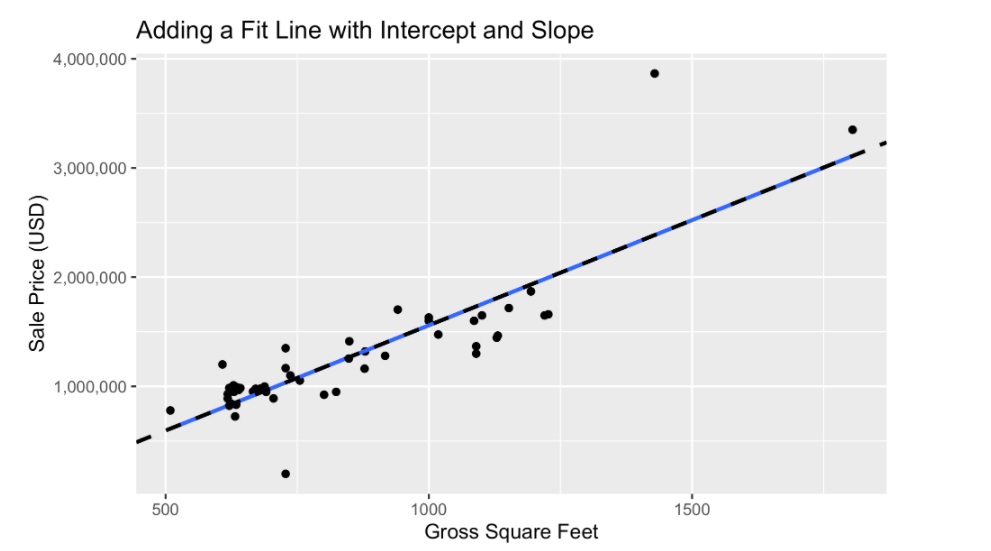

We also used the estimates of slope and intercept to estimate and add the predictions to the data. Generating the predictions enabled us to calculate the residuals, and from this we were able to estimate the 
**R
S
S**
. We verified that our manual estimates for the predictions, residuals, and RSS, matched the linear model estimates generated using the `lm()` function in R.

In this file we will learn how to understand the accuracy of the coefficient estimates, slope and intercept. We will also learn how to assess the accuracy of our linear model. 

We will continue to use the Uber trips dataset for learning purposes and then apply and test our knowledge with the Williamsburg condominium sales data. Let's begin by revisiting the residuals.

Recall that residuals are the distances between our observations and their model-predicted values. We can visualize the residuals in the `uber_trips` scatterplot below as the distance along the y-axis between the observed value for `cost` and the `predicted` value, which is the fit line:

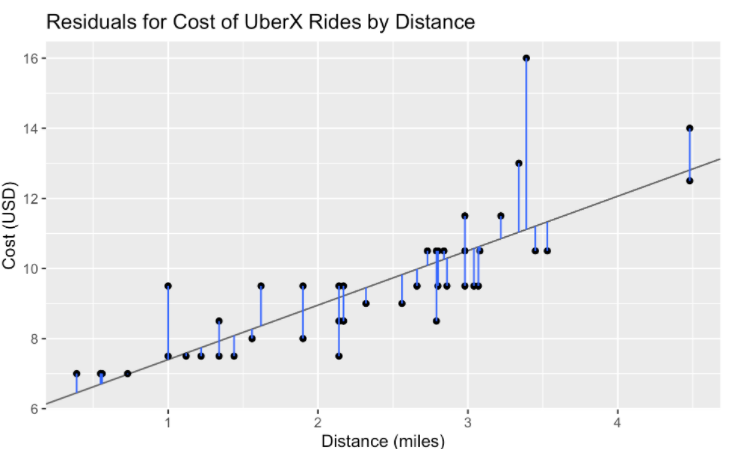

When we are trying to assess how well our model fits the data, another useful way to visualize the residuals is with a histogram. If our model fits well, the residuals should be symmetrically and normally distributed around zero, with the shape of a bell-curve. The distribution does not have to be perfectly symmetrical or normal, the important thing is that there is no obvious visual pattern to them. For example, numerous bins on the far-left or far-right of a histogram would indicate that a linear model is not appropriate for the data because the model is consistently over-or-under estimating the actual values.

Here is the distribution of residuals for the `uber_trips` data:

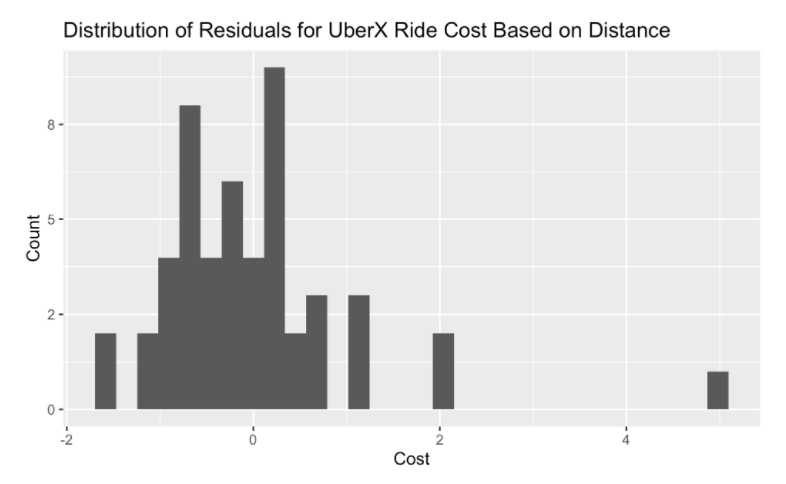

We observe here that the distribution of residuals is roughly distributed around zero. There is one observation to the far-right that may be considered an outlier, and most likely represents the single observation from the scatterplot above with a total trip `cost` of $16. But we do not need to be concerned about single outliers here. The main thing we are checking is that the overall shape of the histogram is roughly symmetrical and centered around zero. This histogram gives us further confidence that a bivariate linear regression model is a reasonable choice for explaining trip `cost` on the basis of `distance`.

Note that we plotted the residuals by extracting the residuals vector from the `uber_lm_fit` model object in `R`. Because `ggplot2` requires the data input to be a dataframe we converted the vector to a dataframe with the [`data.frame` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/data.frame.html) like this:

`resids <- data.frame(uber_lm_fit$residuals)`


Let's plot the residuals for the `condos_lm_fit` linear model object for the `williamsburg_north` dataset. 

**Task**

Generate a histogram of the residuals from the `condos_lm_fit` linear model object.

1. For practice and repetition, fit a linear model of `sale_price` explained by `gross_square_feet` using the `williamsburg_north` dataframe.
2. Load the package required to generate a `ggplot` histogram.
3. Extract the `residuals` vector from the linear model object and convert the vector to a data frame.
4. Generate a histogram of the residuals.

**Answer**

`library(readr)`

`williamsburg_north <- suppressMessages(read_csv("williamsburg_north.csv"))
library(dqanswerchecking)`

`condos_lm_fit <- lm(sale_price ~ gross_square_feet, data = williamsburg_north)`

`library(ggplot2)`

`residuals_df <- data.frame(condos_lm_fit$residuals)`

`ggplot(data = residuals_df, aes(x = condos_lm_fit.residuals)) +
  geom_histogram()`


We observed above that the spread of residuals is roughly distributed around zero for the condominium sales linear model. So like with the `uber_trips` dataset, bivariate linear regression looks to be a reasonable modeling choice for explaining condominium `sale_price` on the basis of `gross_square_feet`.

Now let's formalize our approach with the `uber_trips` data and form a hypothesis that there is a relationship between `distance` and `cost`. We can use information from the `uber_lm_fit` model object to test our hypothesis. 

Hypothesis testing is particularly important if we are interested in using our model to make future predictions on unseen data. Before we use our modeling results to predict future outcomes we need to determine that there is a relationship between 
**X**
 and 
**Y**
 (`distance` and `cost`).

Recall that when the function 
$f$
 is approximated by a bivariate linear function, the mathematical equation looks like this:
 
 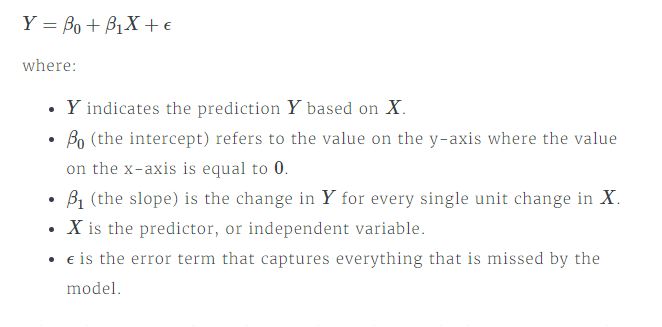

A hypothesis is an educated guess about what we think is going on with our data. In this case, we'll hypothesize that `distance` and `cost` for Uber trips are related. Every hypothesis we form has an opposite hypothesis called the **null hypothesis**:

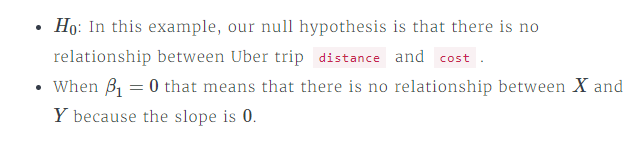

We call the hypothesis that `distance` and `cost` are related the **alternative hypothesis**:

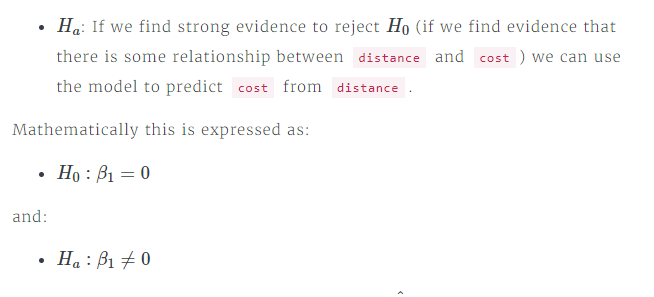

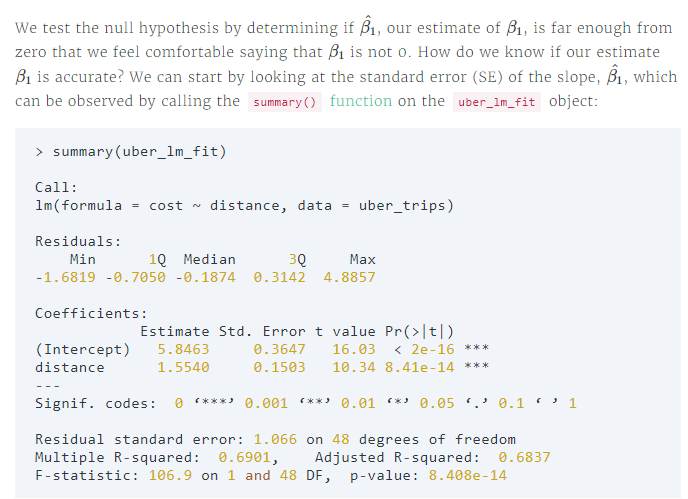

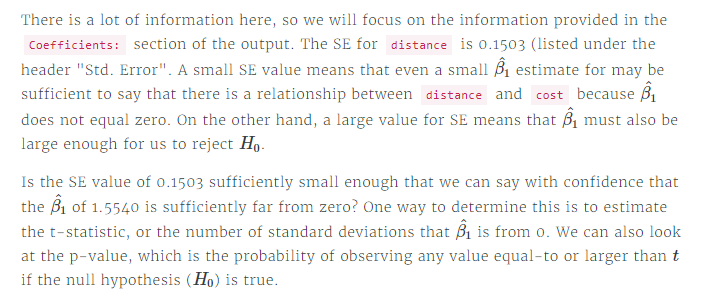

We are mainly concerned with the t-statistic and the p-value for slope, because the slope represents the effect of `distance` on `cost`. 

Let's call the `summary()` function on the linear model object for the Williamsburg-North condominium sales data.

Let's briefly discuss the `summary()` output above. We can see in the `summary()` output the slope and intercept coefficients we previously accessed with the `coef()` or `coefficients()` functions. We also see above the residual sum of squares (called "Residual standard error" here) that we called using the `deviance()` function.

The `summary()` function is very popular in practice when analyzing the results of a linear regression model, but the output can seem overwhelming at first. As we work through we will continue to build our understanding of many of the summary statistics included in the `summary()` output for a linear model.

One way to determine if 
**^
β
1**
 is far enough away from 0 is to estimate the [t-statistic](https://en.wikipedia.org/wiki/T-statistic), or the number of standard deviations that 
**^
β
1**
 is from 0. The t-statistic is provided in the summary() output under the header "t value", but if we want to calculate it manually the equation looks like this:
 
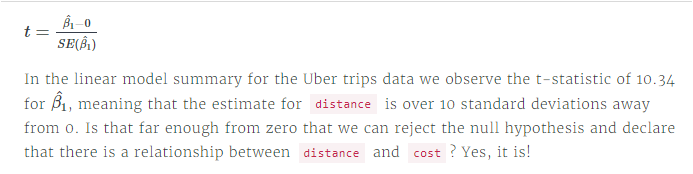

Using the t-statistic we can feel confident declaring that there is some relationship between `distanc`e and `cost`. How do we know this? We consulted the [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) in a statistics textbook to determine that a t-statistic greater than 2.011 is sufficient to reject the null hypothesis at a p-value of 5%. In other words, it is very unlikely the perceived relationship between `distance` and `cost` occurred by chance because the observed t-statistic is 10.34 SE's away from 0, well above the threshold of 2.011.

This t-statistic threshold of 2.011 applies to the `uber_trips` dataset and the `williamsburg_north` dataset because each has a total of 50 observations, or 48 [`degrees of freedom`](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)).

Recall that we are mainly concerned with the t-statistic and the p-value for slope, because the slope represents the effect of `distance` on `cost`.

In the meantime, let's estimate the t-statistic for the condominium sales dataset and see if it matches the `summary()` output.

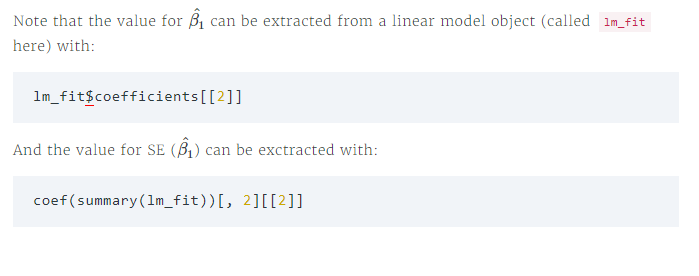

**Task**

Manually estimate the t-statistic.

**Answer**

`t_statistic <- (1926.6 - 0) / 169.5`

We calculated a t-statistic of 11.366 for the `condos_lm_fit` linear model. Like with the `uber_trips` data, this t-statistic is well above the t-distribution threshold of 2.011 meaning that we can reject the null hypothesis and declare that there is a relationship between `gross_square_feet` and `sale_price` for the `williamsburg_north data`.

Related to the t-statistic is the [p-value](https://en.wikipedia.org/wiki/P-value), which is the probability of observing any value equal-to or larger than 
$t$
 if the null hypothesis (
$H_0$
) is true. 

The p-value gauges the likelihood that the coefficient is not significant, which means a smaller p-value is better! The p-value is presented in the `Coefficients`: section of the linear model `summary()` as `Pr(>|t|)`. 

Returning to the `uber_trips` data, we can observe the p-value with the `summary()` function, or we can extract the p-value with either of the following methods:

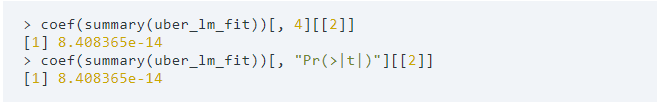

As a reminder, the `e-14` at the end of the number indicates that this number is very small. This is a form of [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation) called E-notation used by computers and calculators to represent very large and very small numbers. The code below shows the float number that equals the E-notation number we see above:

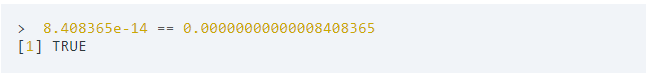

The larger the t-statistic, the smaller the p-value. The p-value we observe above is very small. Generally, we use 0.05 as the cutoff for significance. When p-values are smaller than 0.05, we reject the null hypothesis and declare that there is a relationship between the predictor variable and the response variable.

In the case of the Uber trips data above, we can reject the null hypothesis because the p-value is well-below 0.05. In other words, we can feel confident that there is a relationship between Uber trip `distance` and `cost`.

Remember that we are mainly concerned with the t-statistic and the p-value for slope, because the slope represents the effect of `distance` on `cost`.

We may have noticed the asterisks to the right of `Pr(>|t|)` in the `summary(uber_lm_fit)` output:

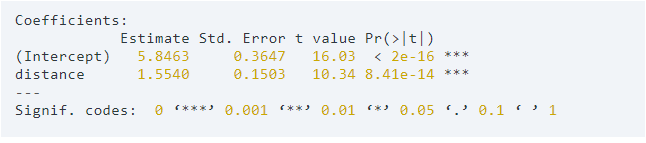

This is a useful feature that flags the significance ratings for quick identification:

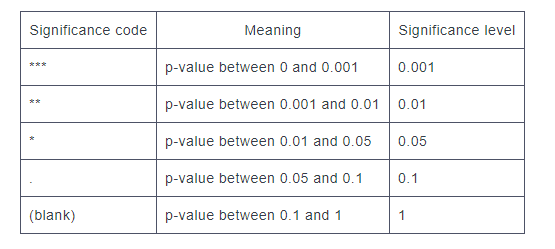

**Task**

1. Extract the p-value of the slope from the `condos_lm_fit` model object.
2. Observe the p-value of the slope and determine if the number is small enough that we can reject the null hypothesis and declare that there is a relationship between `gross_square_feet` and `sale_price`.
    * Assign the value `TRUE` or `FALSE` to the variable `reject_null_hypothesis`.
    
**Answer**

`p_value <- coef(summary(condos_lm_fit))[, 4][[2]]`

`reject_null_hypothesis <- TRUE`

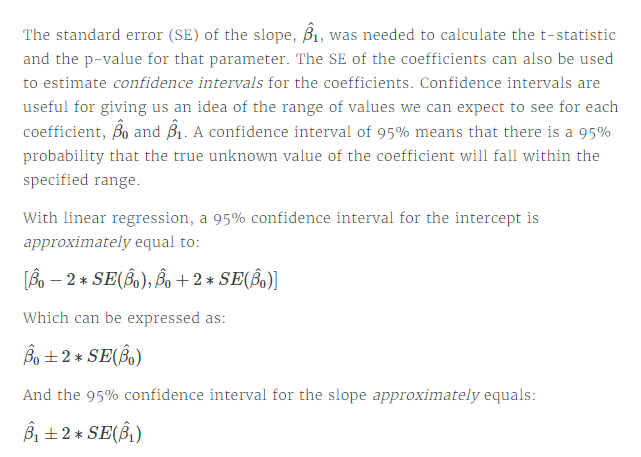

Why approximately? The equations above rely on the assumption that the errors are [`normally distributed`](https://en.wikipedia.org/wiki/Normal_distribution). Also, the factor of 2 in front of SE varies based on the number of observations in the model. In practice when working with `R` we do not have to concern ourselves with this because `R` will estimate the confidence intervals for us.

The confidence intervals are not displayed when calling the `summary()` function on a linear model object, but they can be extracted from the model with the [`confint()` function](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/confint.html). Let's take a look for the `uber_trips` data:

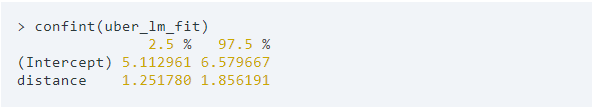

The confidence interval for the intercept can be expressed as [5.112961, 6.579667] which roughly means that if we call an Uber but go a distance of 0 miles, we can expect to pay on average somewhere between `$5.11` and `$6.58`. But we may recall from an earlier lesson that we must be careful about making such statements about the intercept when the intercept falls outside the x-axis range of our data. There are no `uber_trips` observations with a `distance` of 0 miles in our dataset.

The confidence interval for the slope is [1.251780, 1.856191] which means that, on average, an increase in the `distance` of an Uber trip by 1 mile will result in an increase in cost of somewhere between `$1.25` and `$1.86`.

Let's manually calculate the slope confidence intervals for the `condos_lm_fit` model and compare our results to the `confint()` output. We will not bother with manually estimating or interpreting the confidence intervals for the intercept because the x-axis value of 0 for the intercept falls well below the range of values observed for `gross_square_feet`. Also, let's indexing by using the extracted values in our calculations instead of inputting the numeric values.

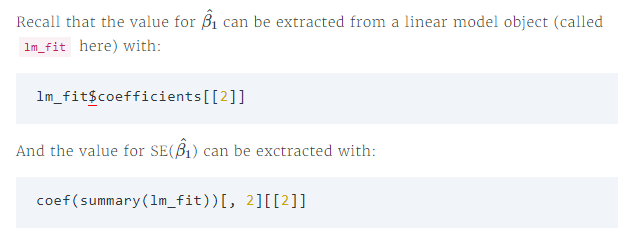

Indexing is a better choice than manually inputting the numeric parameters when there is a chance that our model inputs could change in the future. If we use indexing we won't need to worry about updating our calculations if we need to re-run the model!

**Task**

Utilize the `condos_lm_fit` model object to;

1. manually calculate the lower bound of the confidence interval for slope.
2. manually calculate the upper bound of the confidence interval for slope.
3. Extract the confidence interval for **slope parameter only** using the `confint()` function 
    * Use indexing to select all contents of the `confint()` row that corresponds with slope.
    
We may manually calculate the confidence intervals by extracting the values from the `lm()` object directly, or by entering the float number for each parameter.


**Answer**


`slope_CI_lower <- condos_lm_fit$coefficients[[2]] - 2 * 
  coef(summary(condos_lm_fit))[, 2][[2]]`

`slope_CI_upper <- condos_lm_fit$coefficients[[2]] + 2 * 
  coef(summary(condos_lm_fit))[, 2][[2]]`

`slope_CI <- confint(condos_lm_fit)[2,]`

So far in this file we have rejected the null hypothesis for the `uber_trips` data because the t-statistic was high-enough and the p-value was low enough that we can declare, with confidence, that there is a relationship between 
**X**
 and 
**Y**
, `distance` and `cost`.

Similarly, we can also declare for the `williamsburg_north` data that there is a relationship between `gross_square_feet` and `sale_price`. The next step in the process is to analyze the extent to which the model does or does not fit the data.

In the last file we learned how to calculate the residual sum of squares (RSS) - the sum of the squared residuals. Recall that the RSS can be difficult to interpret by itself. We know that this number represents the minimum sum of the squared residuals using the least squares method. And like with the residuals, or the mean absolute error, a smaller RSS means a better model fit than a larger number. But how do we know if we have a good fit?

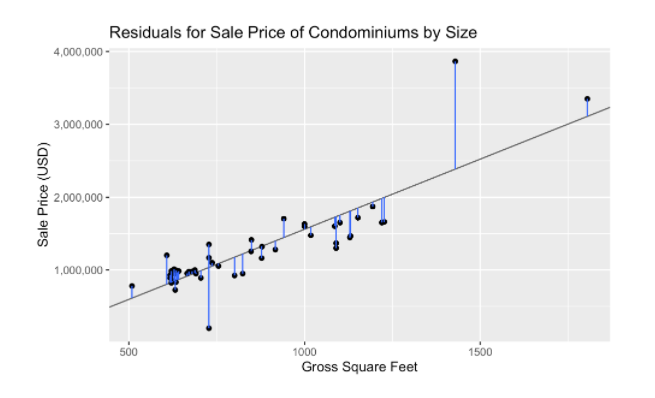

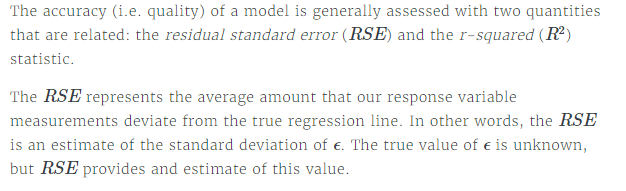

We will learn to calculate and interpret the 
**R
S
E**
, which is actually considered a measure of the lack of fit of the model. Our knowledge of 
**R
S
S**
 will be useful here because we need to have an estimate of 
**R
S
S**
 to calculate 
**R
S
E**
 (and 
$R^
2$
). Like 
**R
S
S**
, the 
**R
S
E**
 tells us how much of the variation in 
**y**
 our model did not explain.

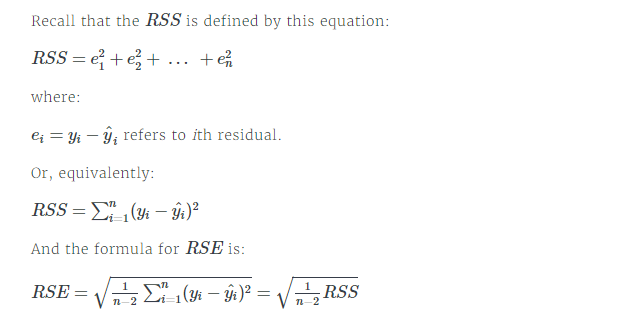

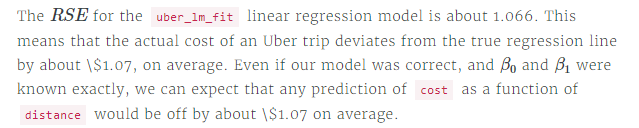

The 
**R
S
E**
 is estimated by `R` when running the `lm()` function and can be extracted from the linear model ouput by calling the [`sigma()` function](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/sigma.html) on the model object like this:
 
 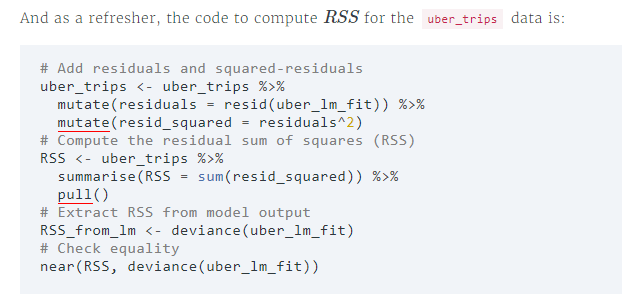

Once the 
**R
S
S**
 has been computed, we can compute 
**R
S
E**
 with a single line of code. 

**Task**

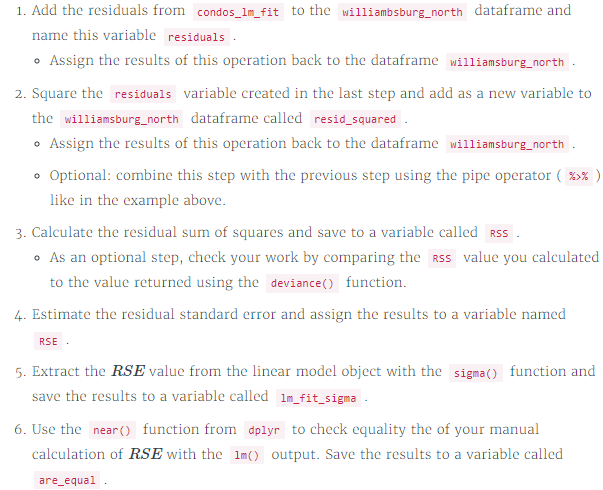


We can check our manual calculation of 
**R
S
E**
 against the value estimated by `R` by calling the `sigma()` function on the linear model object.
 
**Answer**

`library(dplyr)`

`# Add residuals and squared-residuals
williamsburg_north <- williamsburg_north %>%
  mutate(residuals = resid(condos_lm_fit)) %>% 
  mutate(resid_squared = residuals^2)`
  
`# Compute the residual sum of squares (RSS)
RSS <- williamsburg_north %>% 
  summarise(RSS = sum(resid_squared)) %>% 
  pull()`
  
`# Extract RSS from model output
RSS_from_lm <- deviance(condos_lm_fit)`

`# Optional: check RSS equality
near(RSS, deviance(condos_lm_fit))`

`# Manual RSE
RSE <- sqrt(RSS / (nrow(williamsburg_north) - 2))`

`# Alternate method for RSE
RSE <- sqrt(1 / (nrow(williamsburg_north) - 2) * RSS)`

`lm_fit_sigma <- sigma(condos_lm_fit)
are_equal <- near(RSE, lm_fit_sigma)`


The 
**R
S
E**
 statistic we estimated is an absolute measure of the lack of fit of the model. But because 
**R
S
E**
 is measured in the units of 
**Y**
 it can be difficult to interpret. For example, we calculated an 
**R
S
E**
 of `$308,446` in our analysis of `sale_price` on the basis of `gross_square_feet`. Is that a high level of lack of fit, or is that an acceptable error level? We may need to consider another quality statistic to decide.

Another statistic that is used to assess the quality of linear model fit is 
[$R^
2$
 (r-squared)](https://en.wikipedia.org/wiki/Coefficient_of_determination).

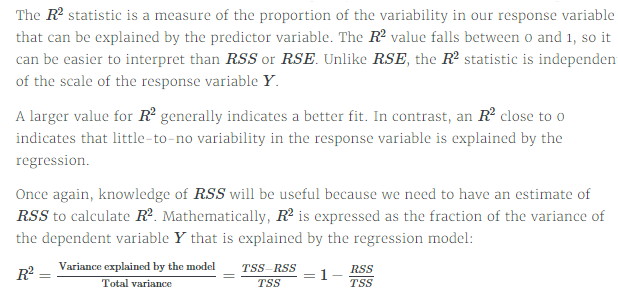

where TSS (the [total sum of squares](https://en.wikipedia.org/wiki/Total_sum_of_squares)) is:

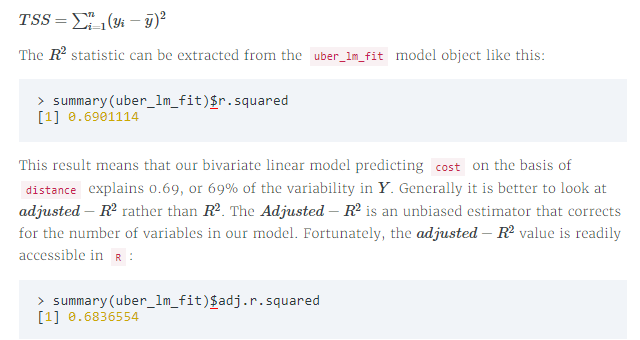

So what is considered a good, or a high 
$R^
2$
 value? Unfortunately, the unsatisfying answer is it depends!. Here are a few important takeaways about 
$R^
2$
:

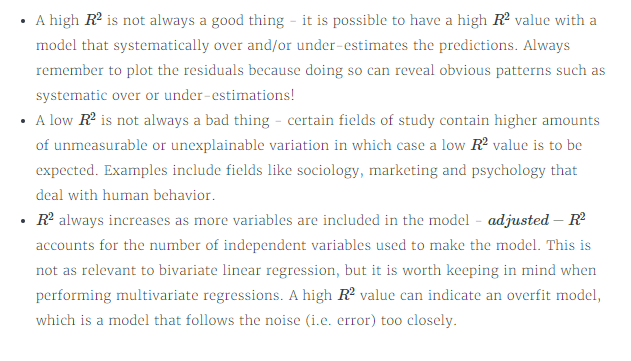

**Task**

1. Manually estimate the total sum of squares (TSS).
2. Manually estimate the 
$R^
2$.
3. Extract the 
$R^
2$
 value from the linear model object.
4. Use the `near()` function from `dplyr` to check equality the of our manual calculation of 
$R^
2$
 with the `lm()` output.
5. Extract the 
$a
d
j
u
s
t
e
d
−
R^
2$
 value from the linear model output.


Take a look at the 
$R^
2$
 value that we calculated manually and verify that it matches the 
$R^
2$
 value extracted from the linear model object.
 
**Answer**

`# Add residuals and squared-residuals
williamsburg_north <- williamsburg_north %>%
  mutate(residuals = resid(condos_lm_fit)) %>% 
  mutate(resid_squared = residuals^2)`
  
`# Compute the residual sum of squares (RSS)
RSS <- williamsburg_north %>% 
  summarise(RSS = sum(resid_squared)) %>% 
  pull()`
  
`TSS <- sum((williamsburg_north$sale_price - 
              mean(williamsburg_north$sale_price))^2)`

`r_squared <- 1 - RSS/TSS`

`lm_r_squared <- summary(condos_lm_fit)$r.squared`

`are_equal <- near(r_squared, lm_r_squared)`

`adj_r_squared <- summary(condos_lm_fit)$adj.r.squared`

We calculated an 
$R^
2$
 value of 0.7291057 for `sale_price` on the basis of `gross_square_feet` for the `williamsburg_north` data. This 
$R^
2$
 value means that nearly 73% of the variability in `sale_price` can be explained by the regression model. This value for 
$R^
2$
 suggests that for the `Williamsburg-North` neighborhood of Brooklyn, `gross_square_feet` does a reasonable job predicting `sale_price` for the type of condominiums we are evaluating. But this may not come as too much of a surprise if we recall the correlation coefficient of 0.8538769 we observed between `gross_square_feet` and `sale_price`.

Recall that correlation is useful in the context of bivariate linear regression because it quantifies the association between two variables. Correlation is one way to measure the linear relationship between two variables. We will see that with bivariate linear regression the squared value of correlation coefficient is equal to 
$R^
2$
.

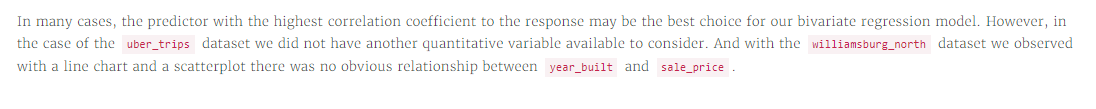

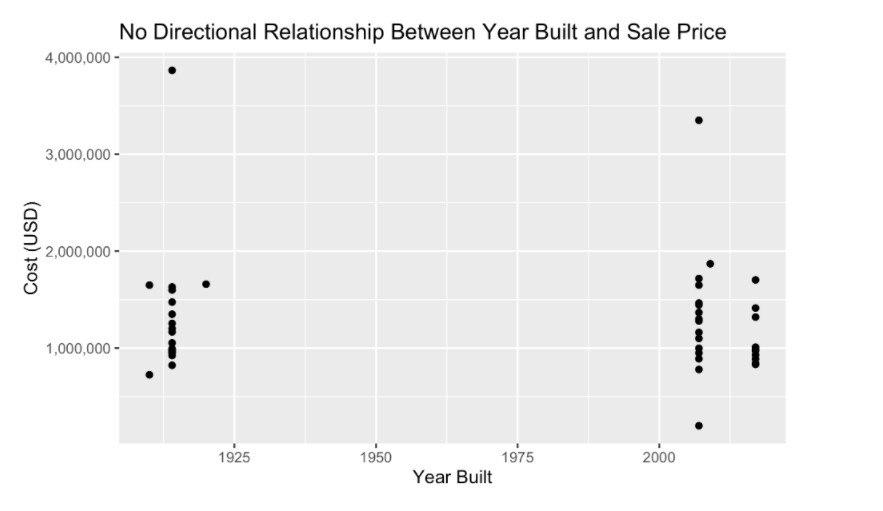

We learned that correlation does not consider the cause-and-effect relationship between two variables, so we do not need to specify a dependent and independent variable. Correlation analysis results are identical regardless of which variable is input to the [`cor()` function](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/cor.html) as `vector_1` or `vector_2`:

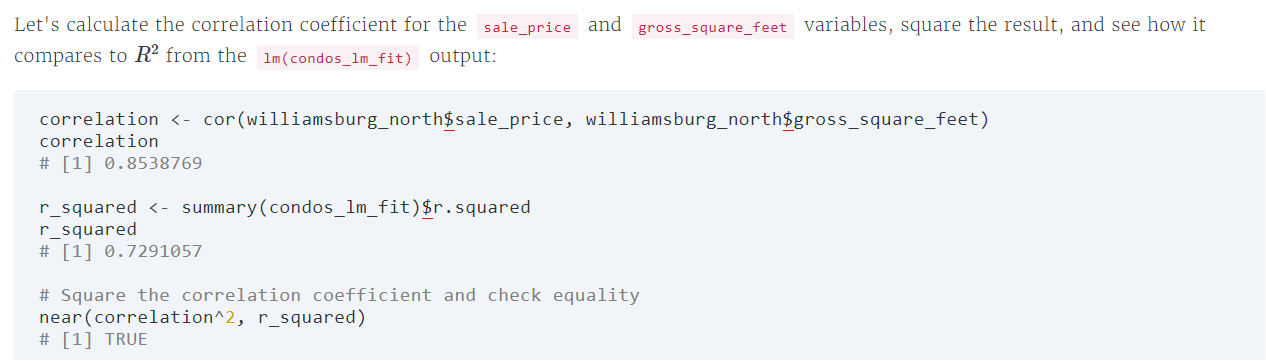

Correlation analysis is called for when there is no dependence between two variables. Regression analysis can be performed when the magnitude of the dependent variable is a function of the magnitude of the independent variable.

In this file we learned how to understand the accuracy of the coefficient estimates, slope and intercept. We also learned a few statistical techniques for assessing the accuracy of our linear model.

We started by plotting the residuals to verify that there are no obvious patterns. With linear regression the residuals should be symmetrically and normally distributed around zero, with the shape of a bell-curve. The distribution does not have to be perfectly symmetrical or normal, but we want to verify that there are no systematic under or over-estimations. Visualization of the residuals for the `uber_lm_fit` and the `condos_lm_fit` indicated that linear regression looks to be a reasonable modeling choice.

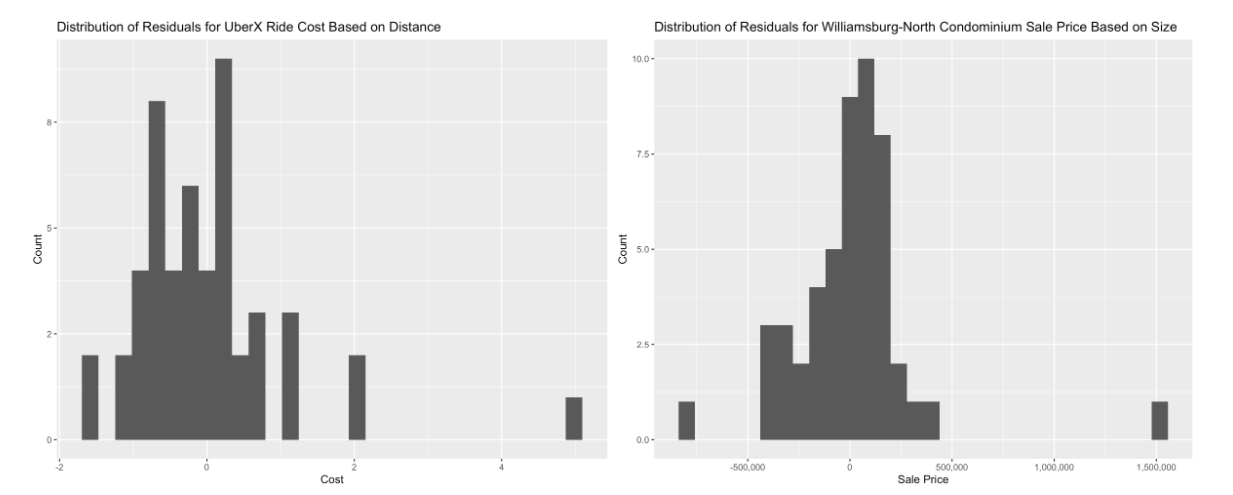

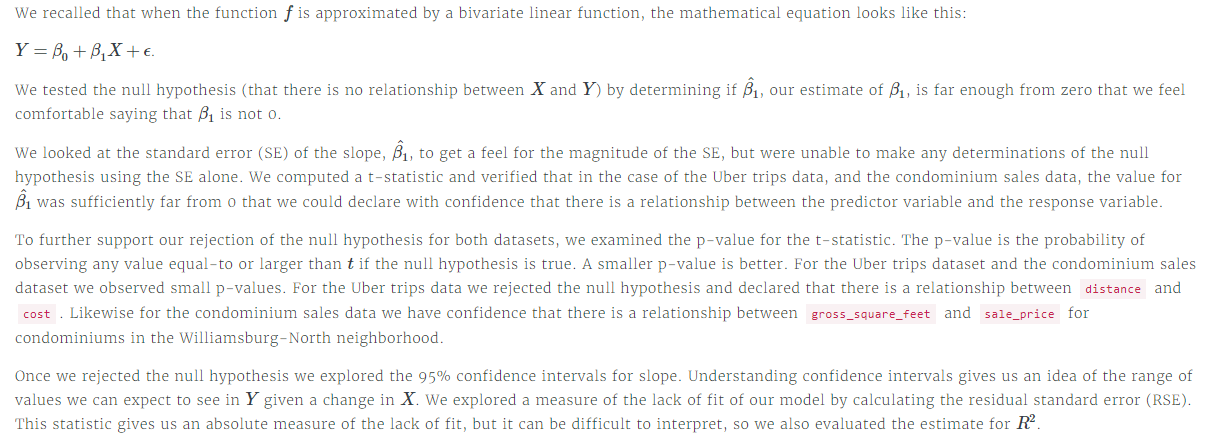

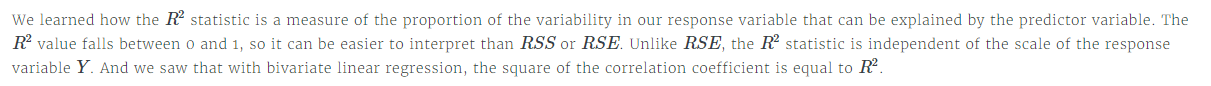